# IPCC AR6 Interactive Atlas Datalab

***

> This notebook is a reproducibility example of the IPCC-WGI AR6 Interactive Atlas products. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Pangeo-Enabled IPCC Interactive Atlas Datalab

The IPCC Interactive Atlas datalab provides data access and resources to reproduce the results of the Interactive Atlas included in the 6th Assesment Report of the IPCC (AR6, [10.1017/9781009157896.021](https://doi.org/10.1017/9781009157896.021)). However, data access was limited to netCDF file downloads and OPeNDAP.

This work provides data access to a cloud optimized version of the Interactive Atlas dataset. Cloud optimized data access is provided for both HDF5 and Zarr.

## Contents in this notebook

1) Data inventory
2) Data loading
   * 2.1 - Zarr
   * 2.2 - HDF5
  
For both Zarr and HDF5 some data loading, manipulation and visualization will be performed.

In [1]:
import pandas as pd
import fsspec
import xarray
import dask

In [2]:
dask.config.set(scheduler="processes")

## Data inventory

The data inventory contains the source locations of the Interactive Atlas dataset. It is provided as a CSV and it can be easily queried using standard tools.

In [3]:
inv = pd.read_csv("../../data_inventory.csv")
inv.head()

,location,type,variable,project,experiment,frequency
0,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,pr,CORDEX-ANT,historical,mon
1,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,tn,CORDEX-ANT,historical,mon
2,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,rx1day,CORDEX-ANT,historical,mon
3,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,tx,CORDEX-ANT,historical,mon
4,https://hub.climate4r.ifca.es/thredds/dodsC/ip...,opendap,txx,CORDEX-ANT,historical,mon


The different protocols for data access are:

- `netcdf` - Local data access when working from the IFCA Climate Hub.
- `opendap` - Remote data access for OPeNDAP compatible clients.
- `zarr` - Remote data access for Zarr compatible clients.
- `h5co` - Remote data access for cloud-optimized HDF5.

In [4]:
print(f"Available protocols: {' '.join(list(inv['type'].unique()))}")

Available protocols: opendap netcdf zarr h5co


## Data loading

### Zarr

We can find the zarr stores using the `type` column.

In [5]:
subset_zarr = inv[inv["type"] == "zarr"]
subset_zarr.head()

,location,type,variable,project,experiment,frequency
1726,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,pr,CORDEX-ANT,historical,mon
1727,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,tn,CORDEX-ANT,historical,mon
1728,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,rx1day,CORDEX-ANT,historical,mon
1729,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,tx,CORDEX-ANT,historical,mon
1730,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,txx,CORDEX-ANT,historical,mon


If we are interested in surface temperature data, we may find all the CMIP experiments for which data is available.

In [6]:
subset_zarr.query('(project == "CMIP6") & (variable == "t")')

,location,type,variable,project,experiment,frequency
1767,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,t,CMIP6,ssp245,mon
1793,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,t,CMIP6,historical,mon
1813,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,t,CMIP6,ssp585,mon
1837,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,t,CMIP6,ssp370,mon
1843,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,zarr,t,CMIP6,ssp126,mon


We can use the `location` to load the dataset into xarray.

In [7]:
location = subset_zarr.query('(project == "CMIP6") & (variable == "t") & (experiment == "historical")')["location"].iloc[0]
location

'https://api.cloud.ifca.es:8080/swift/v1/IPCC-IA-Monthly/zarr/CMIP6/historical/t_CMIP6_historical_mon_185001-201412'

In [ ]:
ds = xarray.open_zarr(location)
ds

### HDF5

We can find the cloud-optimized HDF5 stores using the `type` column.

In [8]:
subset_h5 = inv[inv["type"] == "h5co"]
subset_h5.head()

,location,type,variable,project,experiment,frequency
2589,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,pr,CORDEX-ANT,historical,mon
2590,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,tn,CORDEX-ANT,historical,mon
2591,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,rx1day,CORDEX-ANT,historical,mon
2592,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,tx,CORDEX-ANT,historical,mon
2593,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,txx,CORDEX-ANT,historical,mon


If we are interested in surface temperature data, we may find all the CMIP experiments for which data is available.

In [9]:
subset_h5.query('(project == "CMIP6") & (variable == "t")')

,location,type,variable,project,experiment,frequency
2630,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,t,CMIP6,ssp245,mon
2656,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,t,CMIP6,historical,mon
2676,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,t,CMIP6,ssp585,mon
2700,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,t,CMIP6,ssp370,mon
2706,https://api.cloud.ifca.es:8080/swift/v1/IPCC-I...,h5co,t,CMIP6,ssp126,mon


We can use the `location` to load the dataset into xarray.

In [10]:
location = subset_h5.query('(project == "CMIP6") & (variable == "t") & (experiment == "historical")')["location"].iloc[0]
location

'https://api.cloud.ifca.es:8080/swift/v1/IPCC-IA-Monthly/HDF5CO/CMIP6/historical/t_CMIP6_historical_mon_185001-201412.nc'

In [12]:
fs = fsspec.open(location, cache_type="first", block_size=4*2**20)
ds = xarray.open_dataset(
    fs.open(),
    engine="h5netcdf",
    driver_kwds={
        "fs_page_size": 4*2**20,
        "page_buf_size": 40*2**20})
ds

<xarray.Dataset> Size: 18GB
Dimensions:    (member: 35, time: 1980, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * member     (member) <U45 6kB 'CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1' ... 'MOHC...
  * time       (time) datetime64[ns] 16kB 1850-01-01 1850-02-01 ... 2014-12-01
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    height2m   float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    t          (member, time, lat, lon) float32 18GB ...
    crs        int32 4B ...
Attributes:
    Conventions:               CF-1.9 ACDD-1.3
    experiment_id:             historical
    frequency:                 mon
    institution:               Instituto de Fisica de Cantabria (IFCA, CSIC-U...
    keywords:                  CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    license:                   CC-BY 4.0, https://creativecommons.org/license...
    references:                https://doi.org/10.1017/9781009157896.021 http...
    source:                    CMIP6
    standard_name_vocabulary:  CF Standard Name Table (Version 79, 2022-03-19)
    summary:                   IPCC-WGI AR6 Interactive Atlas dataset: Monthl...
    variable_id:               t

Data can be loaded and plotted using standard xarray functions.

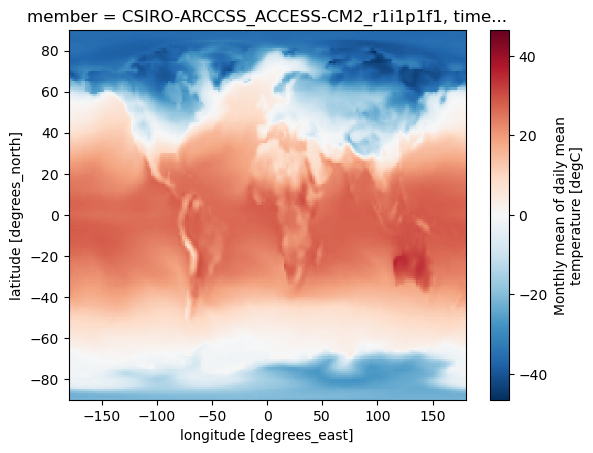

In [16]:
ds["t"].isel(member=0, time=0).plot()